code adapted from https://pub.towardsai.net/multiclass-image-classification-hands-on-with-keras-and-tensoflow-e1cf434f3467

In [166]:
import numpy as np
import os
from random import choice, randint
from PIL import Image, ImageOps
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import classification_report, confusion_matrix
 
# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
 
import cv2
 


import seaborn as sns
import random
import os
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_seed
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [167]:
def show_images(image_list):
    for i in image_list:
        plt.imshow(i)
        plt.pause(0.5)

def convertToArray(image_list):
    image_array_list=[]
    for i in image_list:
        image_array_list.append(np.asarray(i))
    return pd.Series(image_array_list)

def convertToImage(image_array_list):
    image_list=[]
    for i in image_array_list:
        image_list.append(Image.fromarray(i))
    return pd.Series(image_list)

In [168]:
reptiles=pd.DataFrame()

In [169]:
reptile_file=os.listdir("/Users/erikafox/bme-reptile-identification/data/reptiles/")
for i in reptile_file:
    rep_list=[]
    if (i != ".DS_Store"):
        for j in os.listdir("/Users/erikafox/bme-reptile-identification/data/reptiles/"+i):
            if (j != ".DS_Store"):
                if len(rep_list)<500:
                    rep_list.append(Image.open("/Users/erikafox/bme-reptile-identification/data/reptiles/"+i+"/"+j).convert("RGBA"))
        
        rep_list=convertToArray(rep_list)
        df=pd.DataFrame({"image":rep_list})

        df["target"]=i
        reptiles=pd.concat([reptiles,df])
        

In [170]:
remove_types=["Lizard","Toad"]
reptiles=reptiles[reptiles["target"].isin(remove_types)==False]

In [171]:
reptiles["target"].value_counts()


Turtle_Tortoise        500
Crocodile_Alligator    500
Snake                  500
Frog                   499
Iguana                 489
Salamander             468
Gecko                  316
Chameleon              263
Name: target, dtype: int64

In [172]:
reptiles=reptiles.reset_index()

In [173]:
reptiles

,index,image,target
0,0,"[[[5, 6, 0, 255], [3, 4, 0, 255], [7, 8, 2, 25...",Turtle_Tortoise
1,1,"[[[79, 104, 3, 255], [80, 105, 4, 255], [83, 1...",Turtle_Tortoise
2,2,"[[[95, 121, 110, 255], [65, 86, 77, 255], [41,...",Turtle_Tortoise
3,3,"[[[82, 90, 43, 255], [81, 90, 43, 255], [81, 9...",Turtle_Tortoise
4,4,"[[[181, 170, 164, 255], [206, 195, 189, 255], ...",Turtle_Tortoise
...,...,...,...
3530,495,"[[[155, 158, 165, 255], [154, 157, 164, 255], ...",Snake
3531,496,"[[[63, 66, 71, 255], [64, 67, 72, 255], [64, 6...",Snake
3532,497,"[[[81, 135, 119, 255], [74, 126, 113, 255], [7...",Snake
3533,498,"[[[231, 254, 182, 255], [229, 255, 181, 255], ...",Snake


In [174]:
img_list = list(reptiles['image'])
data_img = []
for each in img_list:
               each_img = cv2.cvtColor(each, cv2.COLOR_BGR2RGB)
               #Resize the images:
               each_img_resized = cv2.resize(each_img, (128,128))
               #Save arrays to a list:
               data_img.append(each_img_resized)
# Converting list to numpy array
X = np.array(data_img)

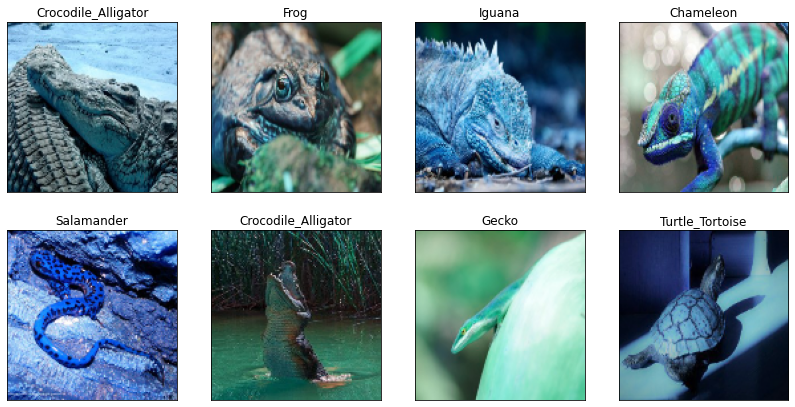

In [175]:
indices = np.random.randint(0,len(reptiles),8)
i = 1
plt.figure(figsize=(14,7))
for each in indices:
    plt.subplot(2,4,i)
    plt.imshow(X[each])
    plt.title(reptiles['target'].loc[each])
    plt.xticks([])
    plt.yticks([])
    i += 1

In [176]:
y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(reptiles['target'].values.reshape(-1,1))

0 - Croc
1 - Frog
2 - Gecko
3 - Iguana
4 - Salamander
5 - Snake
6 - Turtle



In [177]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [178]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape:  (2403, 128, 128, 3)
y_train shape:  (2403, 8)
X_val shape  :  (601, 128, 128, 3)
y_val shape  :  (601, 8)
X_test shape :  (531, 128, 128, 3)
y_test shape :  (531, 8)


In [179]:
train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)
#validation_gen = ImageDataGenerator(horizontal_flip=True,
        ##                            rotation_range = 45,
          #                          zoom_range=0.2,
          #                          height_shift_range = 0.5,
              #                      width_shift_range = 0.5)
train_gen.fit(X_train)
#validation_gen.fit(X_val)

In [180]:
batch_size = 64
epochs = 10
base = Xception(include_top=False, 
                weights='imagenet', 
                input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
head = Dense(y_test.shape[1], activation='softmax')(x)
model = Model(inputs=base.input, outputs=head)
model.compile(optimizer=Adam(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'], run_eagerly=True)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_7[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

/Users/erikafox/opt/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [181]:
mhistory = model.fit_generator(
               train_gen.flow(X_train, y_train,
               batch_size=batch_size),
               epochs = epochs,
               validation_data = validation_gen.flow(X_val, y_val)
)

/var/folders/5b/sjkc4b8n0hs41zd03hxr66100000gn/T/ipykernel_29993/1274160052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mhistory = model.fit_generator(


Epoch 1/10
38/38 [==============================] - 212s 6s/step - loss: 1.9272 - accuracy: 0.2792 - val_loss: 1.9597 - val_accuracy: 0.3195
Epoch 2/10
18/38 [=============>................] - ETA: 2:02 - loss: 1.5593 - accuracy: 0.4791

KeyboardInterrupt: 

In [ ]:
history_df = pd.DataFrame(mhistory.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend();

0 - Croc
1 - Frog
2 - Gecko
3 - Iguana
4 - Salamander
5 - Snake
6 - Turtle

In [ ]:
# Predicting labels from X_test data
y_pred = model.predict(X_test)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)
# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

In [ ]:
print(classification_report(y_test_classes, y_pred_classes))

In [ ]:
# a version of the above model that we can read in in other files


def train_model()